In [1]:
import matplotlib.pyplot as plt
import numpy as np 


In [2]:

master_grid = np.load('/Users/ommahajan/Desktop/Year_4/MEng Individual project/TractographyAlgo/ground_truth_generator/output/master_grid.npy')

A 2d Histogram with heatmap to visualise the oritentation of fibres

Found 1000000 non-zero vectors.
Converted vector directions to spherical coordinates (azimuth, elevation).
Generating 2D histogram of orientations...
✅ FOD visualization complete.


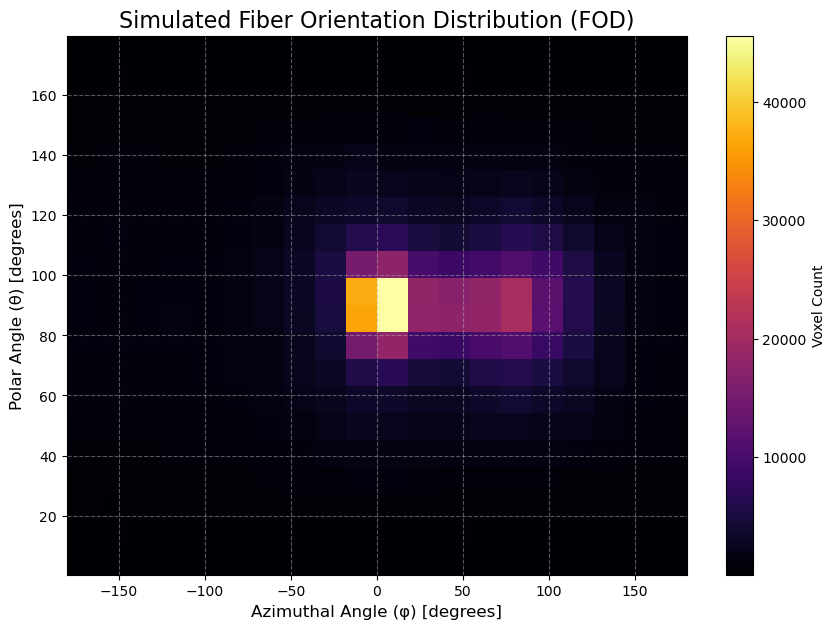

In [3]:

# --- Step 1: Reshape the data and filter out zero vectors ---
all_vectors = master_grid.reshape(-1, 3)
all_vectors = all_vectors[np.any(all_vectors != 0, axis=1)]
print(f"Found {all_vectors.shape[0]} non-zero vectors.")

# --- Step 2: Convert Cartesian vectors (x, y, z) to Spherical angles ---
x, y, z = all_vectors[:, 0], all_vectors[:, 1], all_vectors[:, 2]

# Azimuth (phi) is the angle in the xy-plane (from -pi to pi)
azimuth = np.arctan2(y, x)

# Elevation (theta) is the angle from the z-axis (from 0 to pi)
# Note: We need to clip the z value to avoid domain errors in arccos
elevation = np.arccos(np.clip(z, -1.0, 1.0))

print("Converted vector directions to spherical coordinates (azimuth, elevation).")

# --- Step 3: Create and visualize the 2D histogram ---
print("Generating 2D histogram of orientations...")

plt.figure(figsize=(10, 7))

# hist2d creates a 2D histogram (a heatmap) of the angles
# The bins define the resolution of our orientation histogram
plt.hist2d(np.degrees(azimuth), np.degrees(elevation), bins=20, cmap='inferno')

plt.colorbar(label='Voxel Count')
plt.title('Simulated Fiber Orientation Distribution (FOD)', fontsize=16)
plt.xlabel('Azimuthal Angle (φ) [degrees]', fontsize=12)
plt.ylabel('Polar Angle (θ) [degrees]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)


print("✅ FOD visualization complete.")
plt.show()

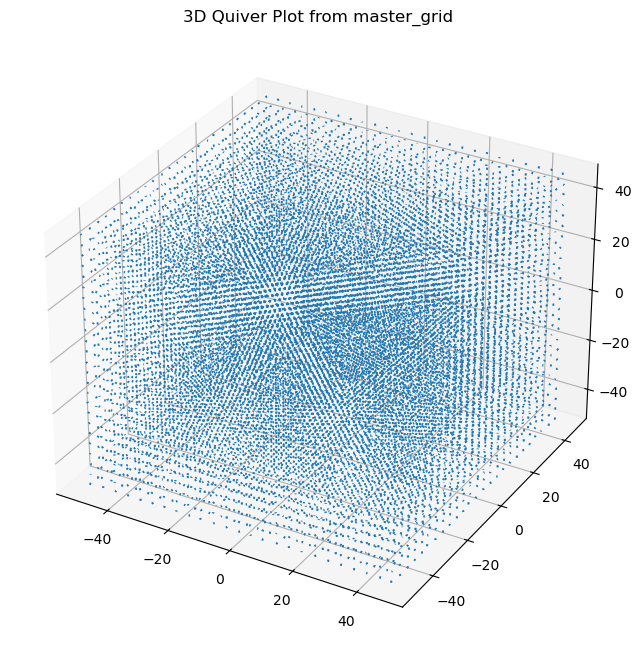

In [4]:
# 1. Get the dimensions of your data
n_i, n_j, n_k, _ = master_grid.shape

# 2. Define the spatial coordinates for the grid
x_coords = np.linspace(-50, 50, n_i)
y_coords = np.linspace(-50, 50, n_j)
z_coords = np.linspace(-50, 50, n_k)

# 3. Create the 3D coordinate arrays required by plotting libraries
X, Y, Z = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')


# --- Subsample the coordinates and master_grid for clarity ---
skip = 4
X_sub = X[::skip, ::skip, ::skip]
Y_sub = Y[::skip, ::skip, ::skip]
Z_sub = Z[::skip, ::skip, ::skip]

# Read vector components directly from the subsampled master_grid
Vx_sub = master_grid[::skip, ::skip, ::skip, 0]
Vy_sub = master_grid[::skip, ::skip, ::skip, 1]
Vz_sub = master_grid[::skip, ::skip, ::skip, 2]

# --- Plotting ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.quiver(
    X_sub, Y_sub, Z_sub,
    Vx_sub, Vy_sub, Vz_sub,
    length=0.5,
    normalize=True
)

ax.set_title("3D Quiver Plot from master_grid")
plt.show()